In [1]:
import numpy as np
import pandas as pd
import os
print(os.getcwd())
import seaborn as sns # 데이터셋을 가져오기 위해 import

C:\Users\USER\lg dx python


In [4]:
#help(pd.DataFrame.groupby)

In [9]:
titan = sns.load_dataset('titanic')
titan.info() # null 의 수, dtype 파악
# 데이터에 등장하는 object(dtype) 는 대부분 문자열
# help, info 함수는 자동으로 출력을 하므로 print 함수를 별도로 사용할 필요 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [11]:
# 필요한 column 만 골라내기
mask = titan[['age', 'sex', 'class', 'fare', 'survived']]
print(mask.head()) # 데이터 필터링 확인

    age     sex  class     fare  survived
0  22.0    male  Third   7.2500         0
1  38.0  female  First  71.2833         1
2  26.0  female  Third   7.9250         1
3  35.0  female  First  53.1000         1
4  35.0    male  Third   8.0500         0


In [18]:
groupedByClass = mask.groupby(['class'])
print(groupedByAge) # object 가 출력됨

In [22]:
# key 에는 그룹화된 컬럼의 값이 전달되고 group 에는 그룹화된 데이터가 전달됨
for key, group in groupedByClass:
    print(key, group.head())

First      age     sex  class     fare  survived
1   38.0  female  First  71.2833         1
3   35.0  female  First  53.1000         1
6   54.0    male  First  51.8625         0
11  58.0  female  First  26.5500         1
23  28.0    male  First  35.5000         1
Second      age     sex   class     fare  survived
9   14.0  female  Second  30.0708         1
15  55.0  female  Second  16.0000         1
17   NaN    male  Second  13.0000         1
20  35.0    male  Second  26.0000         0
21  34.0    male  Second  13.0000         1
Third     age     sex  class     fare  survived
0  22.0    male  Third   7.2500         0
2  26.0  female  Third   7.9250         1
4  35.0    male  Third   8.0500         0
5   NaN    male  Third   8.4583         0
7   2.0    male  Third  21.0750         0


C:\Users\USER\AppData\Local\Temp\ipykernel_6000\2224815610.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, group in groupedByClass:


In [25]:
# 그룹 별 집계가 가능함
# 평균을 나타내는 함수는 mean(average 가 아님)
print(groupedByClass.mean()) # age, fare, surived 의 평균을 나타냄

              age       fare  survived
class                                 
First   38.233441  84.154687  0.629630
Second  29.877630  20.662183  0.472826
Third   25.140620  13.675550  0.242363


C:\Users\USER\AppData\Local\Temp\ipykernel_6000\2357229482.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(groupedByClass.mean())


In [27]:
# 개별 그룹 가져오기 - get_group 함수 사용
group1 = groupedByClass.get_group('First')
group3 = groupedByClass.get_group('Third')
print(group1.head())
print(group3.head())

     age     sex  class     fare  survived
1   38.0  female  First  71.2833         1
3   35.0  female  First  53.1000         1
6   54.0    male  First  51.8625         0
11  58.0  female  First  26.5500         1
23  28.0    male  First  35.5000         1
    age     sex  class     fare  survived
0  22.0    male  Third   7.2500         0
2  26.0  female  Third   7.9250         1
4  35.0    male  Third   8.0500         0
5   NaN    male  Third   8.4583         0
7   2.0    male  Third  21.0750         0


In [28]:
# 여러 개의 컬럼을 합쳐서 그룹화하기
groupedTogether = mask.groupby(['class', 'sex', 'survived'])
for key, group in groupedTogether:
    print(key)

('First', 'female', 0)
('First', 'female', 1)
('First', 'male', 0)
('First', 'male', 1)
('Second', 'female', 0)
('Second', 'female', 1)
('Second', 'male', 0)
('Second', 'male', 1)
('Third', 'female', 0)
('Third', 'female', 1)
('Third', 'male', 0)
('Third', 'male', 1)


In [31]:
print(type(mask[['class']]))

<class 'pandas.core.frame.DataFrame'>


In [34]:
# 집계 함수 사용
print(groupedByClass.std()) # 표준편차를 구함
# DataFrame 으로 리턴

# 특정 컬럼에 대해서만 집계 적용
# 컬럼이 1개이기 때문에 Series 로 리턴
print(groupedByClass['age'].std())
print(groupedByClass.age.std()) # . 을 이용해서 컬럼에 접근하는 경우 컬럼 이름은 반드시 문자열이어야 함
# 결과는 둘 다 동일

              age       fare  survived
class                                 
First   14.802856  78.380373  0.484026
Second  14.001077  13.417399  0.500623
Third   12.495398  11.778142  0.428949
class
First     14.802856
Second    14.001077
Third     12.495398
Name: age, dtype: float64
class
First     14.802856
Second    14.001077
Third     12.495398
Name: age, dtype: float64


C:\Users\USER\AppData\Local\Temp\ipykernel_6000\1779799865.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(groupedByClass.std())


In [35]:
# 사용자 정의 함수 적용하기

# 사용자 정의 함수
# 그룹에 agg 를 이용해서 적용하면 매개변수로 각 그룹이 대입되는 구조
def func(group):
    return group.min()

# 그룹화 된 데이터에 agg 를 통해 함수를 적용
agg_func = groupedByClass.agg(func)
print(agg_func)

         age     sex  fare  survived
class                               
First   0.92  female   0.0         0
Second  0.67  female   0.0         0
Third   0.42  female   0.0         0


In [36]:
# 여러 개의 함수 적용하기 - list 형태 사용

agg_two = groupedByClass.agg([max, min]) # max, min 집계 함수 적용
print(agg_two)

         age         sex              fare      survived    
         max   min   max     min       max  min      max min
class                                                       
First   80.0  0.92  male  female  512.3292  0.0        1   0
Second  70.0  0.67  male  female   73.5000  0.0        1   0
Third   74.0  0.42  male  female   69.5500  0.0        1   0


In [38]:
# 컬럼마다 다른 함수 적용
agg_three = groupedByClass.agg({'fare' : max, 'sex' : min})
print(agg_three)

            fare     sex
class                   
First   512.3292  female
Second   73.5000  female
Third    69.5500  female


In [46]:
# 셀 단위로 함수 적용 - transform 이나 apply 를 사용해야 함
# 그룹 별로 구하는게 아니라 데이터 별로 구하는 score
def z_score(data):
    return(data - data.min())

age_zscore = groupedByClass.age.transform(z_score)
print(age_zscore.head())

# SQL 의 Having 구문을 만들고자 할 때는 filter 함수를 사용
# Having 은 Group By 이후의 조건으로 그룹화 한 항목에 대해 필터링
# 그룹화 한 항목의 필터링은 그룹의 집계함수를 이용해서 필터링을 수행
group_filter = groupedByClass.filter(lambda x : len(x) > 300) # 데이터의 갯수가 300개가 넘는 그룹만 필터링
print(group_filter.head())

0    21.58
1    37.08
2    25.58
3    34.08
4    34.58
Name: age, dtype: float64
    age     sex  class     fare  survived
0  22.0    male  Third   7.2500         0
2  26.0  female  Third   7.9250         1
4  35.0    male  Third   8.0500         0
5   NaN    male  Third   8.4583         0
7   2.0    male  Third  21.0750         0


In [55]:
# 2개의 컬럼으로 그룹화 - 멀티 인덱스 생성
grouped = mask.groupby(['class', 'sex'])

# First class 이고 set 가 female 인 데이터만 가져오기
# DataFrame 에 바로 loc 를 적용할 수 없음
gdf = grouped.min() # 멀티 인덱스에서 최소값만
print(gdf.loc['First', 'female']) # loc 를 사용해서 원하는 데이터만
#print(gdf.xs('female', level = 'sex'))

age          2.0000
fare        25.9292
survived     0.0000
Name: (First, female), dtype: float64


In [60]:
# class 와 sex 별로 age, survived 의 평균 구하기

# list 를 사용해서 적용할 대상을 여럿 지정할 수 있음 - values, aggfunc, columns 등
print(pd.pivot_table(mask, index = 'sex', columns = 'class', values = ['age', 'survived'], aggfunc = 'mean'))
#print(pd.pivot_table(mask, index = 'sex', columns = 'class', values = 'age', aggfunc = 'mean'))
#print(pd.pivot_table(mask, index = 'sex', columns = 'class', values = 'survived', aggfunc = 'mean'))

              age                        survived                    
class       First     Second      Third     First    Second     Third
sex                                                                  
female  34.611765  28.722973  21.750000  0.968085  0.921053  0.500000
male    41.281386  30.740707  26.507589  0.368852  0.157407  0.135447


## 서울시 구 별 인구수와 CCTV 갯수 탐색

### 필요한 라이브러리 import

In [2]:
# 시각화를 위한 패키지
import matplotlib.pyplot as plt

# 시각화를 할 때 한글 출력을 위한 import
import platform
from matplotlib import font_manager, rc

### 데이터 읽어오기

In [4]:
cctv = pd.read_excel('./data/cctv.xlsx')

# 데이터 확인
#print(cctv.head())
#cctv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   기관명       25 non-null     object 
 1   소계        25 non-null     int64  
 2   2011년 이전  23 non-null     float64
 3   2012년     23 non-null     float64
 4   2013년     23 non-null     float64
 5   2014년     25 non-null     int64  
 6   2015년     25 non-null     int64  
 7   2016년     25 non-null     int64  
 8   2017년     25 non-null     int64  
 9   2018년     25 non-null     int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 2.1+ KB


In [24]:
# pop.txt 파일을 확인해보면 처음 2개의 행은 의미가 없음
# 한글 데이터를 포함 중
# 구분 기호는 탭
# 숫자에 천 단위 구분기호 사용중


pop = pd.read_csv('./data/pop.txt', skiprows = 2, delimiter = '\t', thousands = ',')
print(pop.head()) # 중복으로 사용되는 남자, 여자, 계 컬럼 뒤에 자동으로 숫자가 붙음
#pop.info()

         기간  자치구       세대        계       남자       여자      계.1     남자.1  \
0  2021.2/4   합계  4405638  9795426  4756178  5039248  9565990  4649442   
1  2021.2/4  종로구    73525   155106    75009    80097   146029    70985   
2  2021.2/4   중구    62897   132259    64526    67733   123016    60019   
3  2021.2/4  용산구   111650   240665   116858   123807   226378   108948   
4  2021.2/4  성동구   134542   295767   143927   151840   289162   141042   

      여자.1     계.2    남자.2    여자.2  세대당인구  65세이상고령자  
0  4916548  229436  106736  122700   2.17   1576971  
1    75044    9077    4024    5053   1.99     27605  
2    62997    9243    4507    4736   1.96     23980  
3   117430   14287    7910    6377   2.03     38884  
4   148120    6605    2885    3720   2.15     45591  


### 컬럼의 이름 수정

In [25]:
# 서로 다른 데이터를 사용할 때 컬럼 이름이 서로 같아야 편리함

# 컬럼 이름 수정
cctv.rename(columns = {cctv.columns[0] : '구별'}, inplace = True)
pop.rename(columns = {pop.columns[1] : '구별'}, inplace = True)

# cctv 의 구 이름에는 중간에 공백이 존재하고 pop 의 구 이름에는 공백이 없음
# 공백의 유무로 인해 데이터가 달라지므로 공백을 제거해서 통일시켜줘야 함
gu = []
for x in cctv['구별']:
    gu.append(x.replace(' ', ''))
cctv['구별'] = gu

print(cctv.head())
print(pop.head())

    구별    소계  2011년 이전  2012년  2013년  2014년  2015년  2016년  2017년  2018년
0  강남구  5221    1944.0  195.0  316.0    430    546    765    577    448
1  강동구  1879     303.0  387.0  134.0     59    144    194    273    385
2  강북구  1265     243.0   88.0  141.0     74    145    254      1    319
3  강서구  1617     219.0  155.0  118.0    230    187    190    264    254
4  관악구  3985     430.0   56.0  419.0    487    609    619    694    671
         기간   구별       세대        계       남자       여자      계.1     남자.1  \
0  2021.2/4   합계  4405638  9795426  4756178  5039248  9565990  4649442   
1  2021.2/4  종로구    73525   155106    75009    80097   146029    70985   
2  2021.2/4   중구    62897   132259    64526    67733   123016    60019   
3  2021.2/4  용산구   111650   240665   116858   123807   226378   108948   
4  2021.2/4  성동구   134542   295767   143927   151840   289162   141042   

      여자.1     계.2    남자.2    여자.2  세대당인구  65세이상고령자  
0  4916548  229436  106736  122700   2.17   1576971  
1    75044    9

### 불필요한 열과 행 제거

In [26]:
# pop 데이터에서 기간, 구별, 계, 남자, 여자 열만 필요함
pop = pop[['기간', '구별', '계', '남자', '여자']] # 필요한 데이터만 가져오기

# pop의 데이터에서 합계를 나타내는 첫번째 행은 불필요
pop.drop([0], inplace = True) # 불필요한 데이터 제거

# 새로운 열을 추가 - 없는 열 이름에 데이터를 대입
pop['여성비율'] = pop['여자'] / pop['계'] * 100
print(pop)

          기간    구별       계      남자      여자       여성비율
1   2021.2/4   종로구  155106   75009   80097  51.640169
2   2021.2/4    중구  132259   64526   67733  51.212394
3   2021.2/4   용산구  240665  116858  123807  51.443708
4   2021.2/4   성동구  295767  143927  151840  51.337708
5   2021.2/4   광진구  355306  170624  184682  51.978295
6   2021.2/4  동대문구  352259  172865  179394  50.926733
7   2021.2/4   중랑구  394679  194556  200123  50.705257
8   2021.2/4   성북구  443206  212849  230357  51.975154
9   2021.2/4   강북구  306093  148824  157269  51.379483
10  2021.2/4   도봉구  322419  156843  165576  51.354294
11  2021.2/4   노원구  520005  250532  269473  51.821232
12  2021.2/4   은평구  479409  229241  250168  52.182583
13  2021.2/4  서대문구  317699  150608  167091  52.594122
14  2021.2/4   마포구  379984  177998  201986  53.156449
15  2021.2/4   양천구  454288  222538  231750  51.013894
16  2021.2/4   강서구  582995  280822  302173  51.831148
17  2021.2/4   구로구  424582  210936  213646  50.319137
18  2021.2/4   금천구  244685  

### 데이터 결합

In [27]:
DF = pd.merge(cctv, pop, on = '구별')
print(DF)

      구별    소계  2011년 이전  2012년  2013년  2014년  2015년  2016년  2017년  2018년  \
0    강남구  5221    1944.0  195.0  316.0    430    546    765    577    448   
1    강동구  1879     303.0  387.0  134.0     59    144    194    273    385   
2    강북구  1265     243.0   88.0  141.0     74    145    254      1    319   
3    강서구  1617     219.0  155.0  118.0    230    187    190    264    254   
4    관악구  3985     430.0   56.0  419.0    487    609    619    694    671   
5    광진구  1581     470.0   42.0   83.0     87     64     21    468    346   
6    구로구  3227     852.0  219.0  349.0    187    268    326    540    486   
7    금천구  1634      27.0   17.0  242.0    101    382    136    199    530   
8    노원구  1906     481.0  117.0  203.0     80    461    298    110    156   
9    도봉구   858     197.0   66.0    8.0    185     59    155    117     71   
10  동대문구  2003       NaN    NaN    NaN   1326    111    233    136    197   
11   동작구  1780     238.0   93.0   29.0    503    130    254    278    255   

### 불필요한 열 삭제

In [28]:
# 2011년 이전, 2012년 ~ 2017년, 기간 열을 삭제
# del 을 이용 - pandas 에서는 비추천
del DF['2011년 이전']
del DF['2012년']
del DF['2013년']
del DF['2014년']
del DF['2015년']
del DF['2016년']
del DF['2017년']
del DF['기간']

print(DF)

      구별    소계  2018년       계      남자      여자       여성비율
0    강남구  5221    448  536107  256449  279658  52.164587
1    강동구  1879    385  469094  230388  238706  50.886603
2    강북구  1265    319  306093  148824  157269  51.379483
3    강서구  1617    254  582995  280822  302173  51.831148
4    관악구  3985    671  502698  251713  250985  49.927591
5    광진구  1581    346  355306  170624  184682  51.978295
6    구로구  3227    486  424582  210936  213646  50.319137
7    금천구  1634    530  244685  124394  120291  49.161575
8    노원구  1906    156  520005  250532  269473  51.821232
9    도봉구   858     71  322419  156843  165576  51.354294
10  동대문구  2003    197  352259  172865  179394  50.926733
11   동작구  1780    255  397231  191657  205574  51.751751
12   마포구  1935    195  379984  177998  201986  53.156449
13  서대문구  2121    194  317699  150608  167091  52.594122
14   서초구  2835    396  422174  202027  220147  52.146035
15   성동구  2679    294  295767  143927  151840  51.337708
16   성북구  3003    643  443206  

### 인덱스 재설정

In [29]:
# primary key 역할을 하는 '구별' 을 인덱스로 설정
DF.set_index('구별', inplace = True)
print(DF.head())

       소계  2018년       계      남자      여자       여성비율
구별                                                 
강남구  5221    448  536107  256449  279658  52.164587
강동구  1879    385  469094  230388  238706  50.886603
강북구  1265    319  306093  148824  157269  51.379483
강서구  1617    254  582995  280822  302173  51.831148
관악구  3985    671  502698  251713  250985  49.927591


In [32]:
# matplotlib 의 기본 폰트가 한글을 지원하지 않기 때문에 폰트 설정이 필요
# 운영체제 별로 폰트의 위치가 다르므로 조건문을 이용해서 설정
# windows 의 경로를 설정할 때 / 로 디렉토리를 구분해도 \ 로 변경해서 적용됨

if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname = 'c:/Windows/Fonts/malgun.ttf').get_name()
    rc('font', family = font_name)

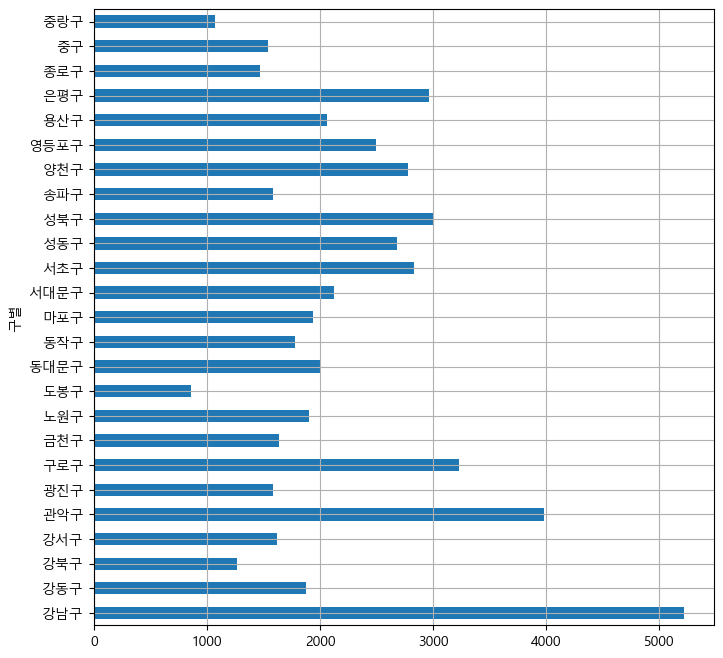

In [33]:
# pandas 기능을 사용해서 그래프 그리기
# 막대 그래프는 주로 크기 비교를 위해 사용하므로 정렬을 하고 사용하는게 좋음

# kind 는 막대 그래프
# grid 는 눈금 여부
# figsize 는 그래프 크기
DF['소계'].plot(kind = 'barh', grid = True, figsize = (8, 8))
# 자동으로 인덱스(구별)를 사용해서 그래프를 그림
plt.show()


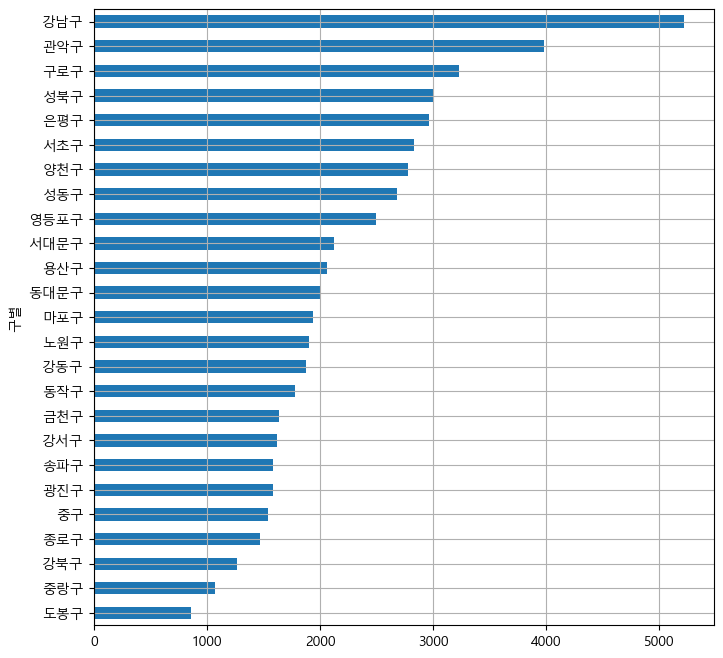

In [37]:
# 데이터를 내림차순으로 정렬해서 그래프를 그림
DF['소계'].sort_values().plot(kind = 'barh', grid = True, figsize = (8, 8))
plt.show()

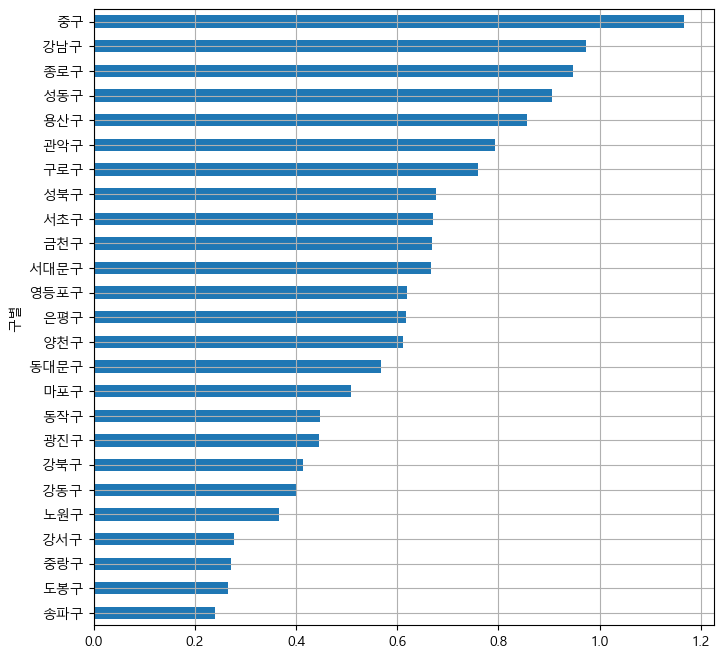

In [38]:
# 새로운 컬럼 추가
# 인구수 대비 cctv 개수를 추가
# 추가한 컬럼을 가지고 막대 그래프 그리기


DF['cctv비율'] = DF['소계'] / DF['계'] * 100
DF['cctv비율'].sort_values().plot(kind = 'barh', grid = True, figsize = (8, 8))
plt.show()

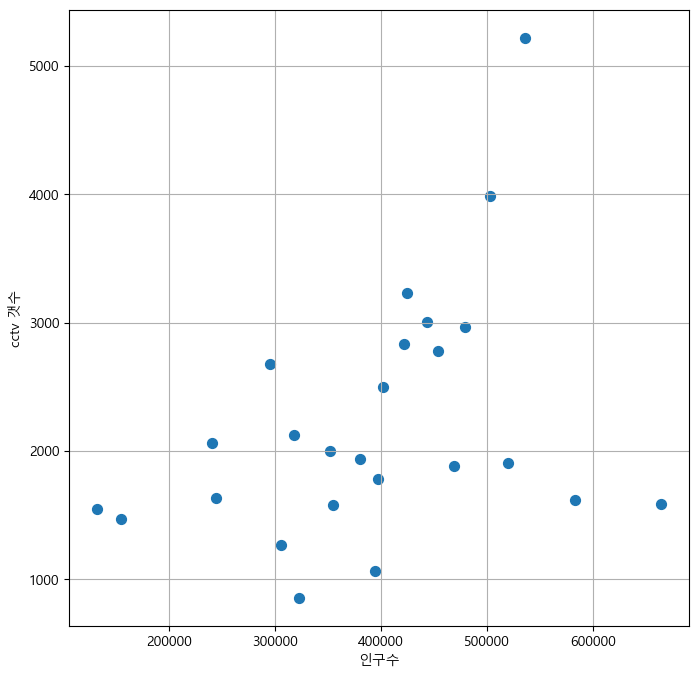

In [39]:
plt.figure(figsize = (8, 8))
plt.scatter(DF['계'], DF['소계'], s = 50)
plt.xlabel('인구수')
plt.ylabel('cctv 갯수')
plt.grid()

plt.show()
# 상업지구와 같은 곳에 cctv 가 많으므로 인구와 큰 연관은 없음

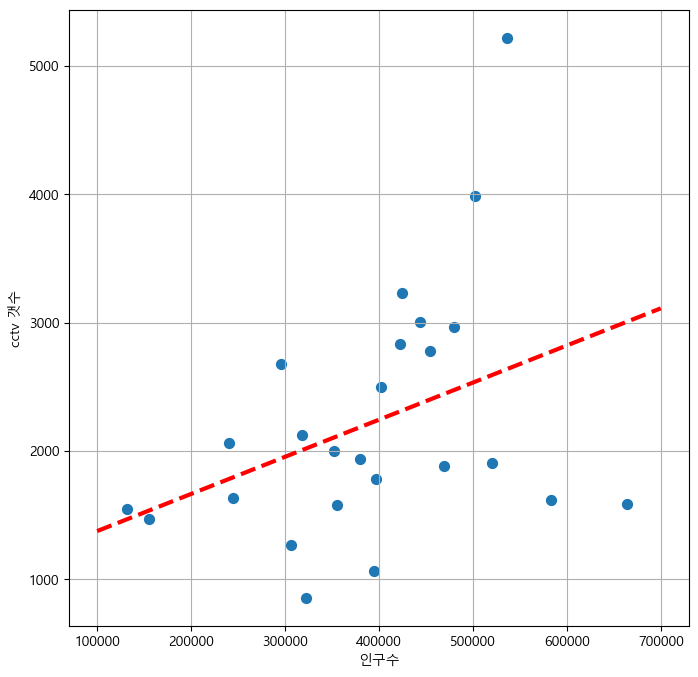

In [41]:
# 2개 항목의 단항식 구하기
# polyfit 을 이용하면 단항식을 구할 수 있음
fp1 = np.polyfit(DF['계'], DF['소계'], 1 )
f1 = np.poly1d(fp1)
#print(f1)

# 산점도와 단항식을 같이 출력
fx = np.linspace(100000, 700000, 100) # 100 을 간격으로 그리기

plt.figure(figsize = (8, 8))
plt.scatter(DF['계'], DF['소계'], s = 50)
# ls 는 직선의 형태, lw 는 직선 굵기
plt.plot(fx, f1(fx), ls = 'dashed', lw = 3, color = 'red')
plt.xlabel('인구수')
plt.ylabel('cctv 갯수')
plt.grid()

plt.show()

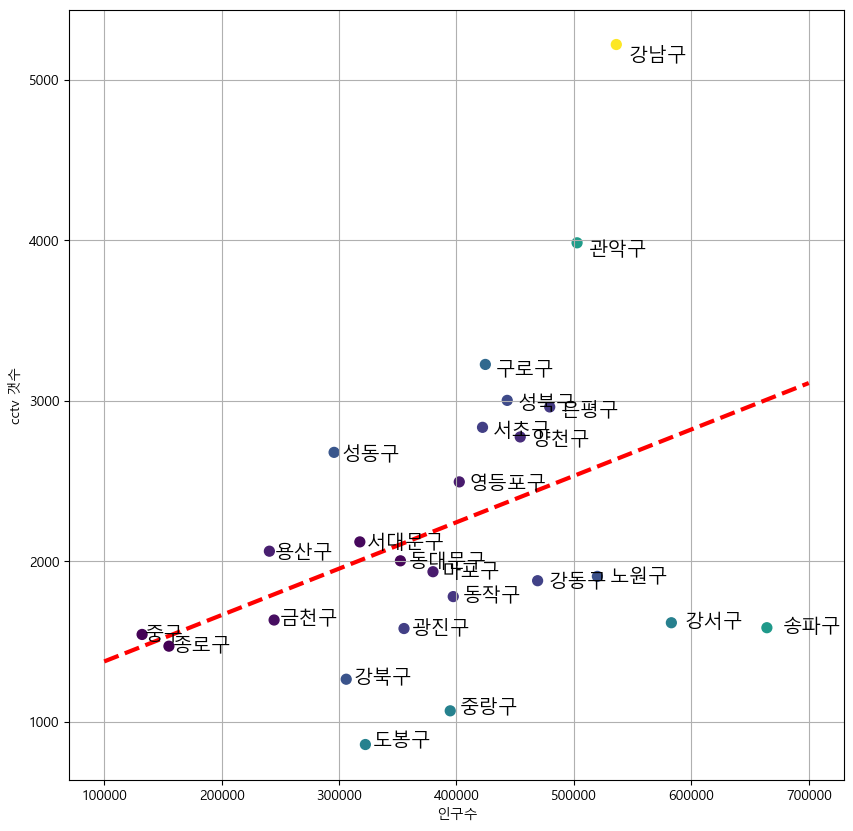

In [45]:
# 오차 값 구하기
# 추세선을 통해 예측한 값과 실제 소계 사이의 차이를 구함
DF['오차'] = np.abs(DF['소계'] - f1(DF['계']))

plt.figure(figsize = (10, 10))
# 오차 값을 사용해서 색을 지정
# 추세선과 떨어진 정도에 따라 색이 달라짐
plt.scatter(DF['계'], DF['소계'], c = DF['오차'], s = 50)
plt.plot(fx, f1(fx), ls = 'dashed', lw = 3, color = 'red')

# 레이블 나타내기
# x 좌표, y 좌표, 출력할 텍스트, 폰트 사이즈 순서
for n in range(25): # 전체 25개 데이터
    plt.text(DF['계'][n] * 1.02, DF['소계'][n] * 0.98, DF.index[n], fontsize = 14)
    

plt.xlabel('인구수')
plt.ylabel('cctv 갯수')
plt.grid()

plt.show()

In [52]:
# 멀티 인덱스로 사용할 데이터 생성

# list, tuple 을 사용해서 멀티 인덱스 구성
# pandas 의 MultiIndex 함수 사용
# 인덱스는 큰 구성(cust_1, 2), 작은 구성(2015, 2016) 순서
multi_index = pd.MultiIndex.from_tuples([('cust_1', '2015'), ('cust_1', '2016'),
                                        ('cust_2', '2015'), ('cust_2', '2016')])

# 인덱스에 맞춰서 4x4 데이터 구성
# 인덱스는 위의 멀티 인덱스를 가져와서 적용
data = pd.DataFrame(np.arange(16).reshape(4, 4),
                   index = multi_index, columns = ['prd_1', 'prd_2', 'prd_3', 'prd_4'], 
                    dtype = 'int')
print(data)

             prd_1  prd_2  prd_3  prd_4
cust_1 2015      0      1      2      3
       2016      4      5      6      7
cust_2 2015      8      9     10     11
       2016     12     13     14     15


In [49]:
# 컬럼들이 데이터의 하위 인덱스가 됨
data_stacked = data.stack()
print(data_stacked)

cust_1  2015  prd_1     0
              prd_2     1
              prd_3     2
              prd_4     3
        2016  prd_1     4
              prd_2     5
              prd_3     6
              prd_4     7
cust_2  2015  prd_1     8
              prd_2     9
              prd_3    10
              prd_4    11
        2016  prd_1    12
              prd_2    13
              prd_3    14
              prd_4    15
dtype: int32


In [54]:
data_stacked = data.stack(dropna = False)
print(data_stacked)

cust_1  2015  prd_1     0
              prd_2     1
              prd_3     2
              prd_4     3
        2016  prd_1     4
              prd_2     5
              prd_3     6
              prd_4     7
cust_2  2015  prd_1     8
              prd_2     9
              prd_3    10
              prd_4    11
        2016  prd_1    12
              prd_2    13
              prd_3    14
              prd_4    15
dtype: int32


In [55]:
# unstack 함수를 사용해서 다시 인덱스를 컬럼으로
# 0 레벨은 가장 큰 인덱스이고 level 의 숫자가 커질수록 작은 범위
print(data_stacked.unstack(level = 2))

             prd_1  prd_2  prd_3  prd_4
cust_1 2015      0      1      2      3
       2016      4      5      6      7
cust_2 2015      8      9     10     11
       2016     12     13     14     15


In [60]:
# 데이터 읽기

data = pd.read_csv('./data/macrodata.csv')


# 시계열 인덱스 생성
# pandas 의 PeriodIndex 함수 사용
# year, quarter 를 합쳐서 인덱스 생성
# 적용할 데이터를 나열하고 마지막에 이름(name)을 지정
periods = pd.PeriodIndex(year = data['year'], quarter = data['quarter'],
                        name = 'date')
print(periods) # 1959Q1, 1959Q2, ... , 2009Q3

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', name='date', length=203)


In [61]:
columns = pd.Index(['realgdp', 'infl', 'unemp'], name = 'item')
#print(columns)

data = data.reindex(columns = columns)
print(data.head())

Index(['realgdp', 'infl', 'unemp'], dtype='object', name='item')
item   realgdp  infl  unemp
0     2710.349  0.00    5.8
1     2778.801  2.34    5.1
2     2775.488  2.74    5.3
3     2785.204  0.27    5.6
4     2847.699  2.31    5.2


In [62]:
# 인덱스에 날짜를 설정
data.index = periods.to_timestamp('D', 'end') # 쿼터의 마지막 날을 세부 데이터로 설정
# start 를 사용하면 첫째날(1월 1일, 4월 1일 ...)
print(data.head())

item                            realgdp  infl  unemp
date                                                
1959-03-31 23:59:59.999999999  2710.349  0.00    5.8
1959-06-30 23:59:59.999999999  2778.801  2.34    5.1
1959-09-30 23:59:59.999999999  2775.488  2.74    5.3
1959-12-31 23:59:59.999999999  2785.204  0.27    5.6
1960-03-31 23:59:59.999999999  2847.699  2.31    5.2


In [64]:
# 날짜를 데이터로 사용
# date 라는 이름의 컬럼이 됨
idata = data.stack().reset_index().rename(columns = {0:'value'})
print(idata)

                             date     item      value
0   1959-03-31 23:59:59.999999999  realgdp   2710.349
1   1959-03-31 23:59:59.999999999     infl      0.000
2   1959-03-31 23:59:59.999999999    unemp      5.800
3   1959-06-30 23:59:59.999999999  realgdp   2778.801
4   1959-06-30 23:59:59.999999999     infl      2.340
..                            ...      ...        ...
604 2009-06-30 23:59:59.999999999     infl      3.370
605 2009-06-30 23:59:59.999999999    unemp      9.200
606 2009-09-30 23:59:59.999999999  realgdp  12990.341
607 2009-09-30 23:59:59.999999999     infl      3.560
608 2009-09-30 23:59:59.999999999    unemp      9.600

[609 rows x 3 columns]


In [65]:
# 피봇 테이블을 적용해서 이전 형식으로 되돌림
pivoted = idata.pivot('date', 'item', 'value')
print(pivoted.head())

item                           infl   realgdp  unemp
date                                                
1959-03-31 23:59:59.999999999  0.00  2710.349    5.8
1959-06-30 23:59:59.999999999  2.34  2778.801    5.1
1959-09-30 23:59:59.999999999  2.74  2775.488    5.3
1959-12-31 23:59:59.999999999  0.27  2785.204    5.6
1960-03-31 23:59:59.999999999  2.31  2847.699    5.2


C:\Users\USER\AppData\Local\Temp\ipykernel_9240\2766482959.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivoted = idata.pivot('date', 'item', 'value')


In [68]:
# melt 함수 사용

data = pd.DataFrame({'cust_id' : [1, 2, 3, 4], 'prod_id' : ['a', 'b', 'c', 'd'],
                    'pch_cnt' : [1, 2, 3, 4], 'pch_price' : [100, 200, 300, 400],
                    'pch_amt' : [15, 25, 35, 45]})
#print(data)

# melt 함수 적용
# 남겨둘 컬럼만 id_vars 에 작성
# 나머지 세 컬럼에서 컬럼 이름은 variable, 컬럼의 값은 value 에 들어감
result = pd.melt(data, id_vars = ['cust_id', 'prod_id'])
print(result)

    cust_id prod_id   variable  value
0         1       a    pch_cnt      1
1         2       b    pch_cnt      2
2         3       c    pch_cnt      3
3         4       d    pch_cnt      4
4         1       a  pch_price    100
5         2       b  pch_price    200
6         3       c  pch_price    300
7         4       d  pch_price    400
8         1       a    pch_amt     15
9         2       b    pch_amt     25
10        3       c    pch_amt     35
11        4       d    pch_amt     45


In [74]:
# crosstab 을 사용해서 교차 분석

data = pd.DataFrame({'id' : ['id1', 'id2', 'ad2', 'ad1'], 
                     'pch1' : ['a', 'b', 'c', 'a'], 'pch2' : ['a', 'd', 'c', 'a']})

# pch1 과 pch2 의 빈도 분석
print(pd.crosstab(data['pch1'], data['pch2'],
                 rownames = ['세로'], colnames = ['가로'], 
                  normalize = True)) # pch1, pch2 에서 빈도 분석
# normalize 를 사용하면 빈도 대신 비율로 나타냄

print()

print(pd.crosstab(data.id, [data['pch1'], data['pch2']])) # id 를 사용해서 한 번 더 묶음 

가로    a     c     d
세로                 
a   0.5  0.00  0.00
b   0.0  0.00  0.25
c   0.0  0.25  0.00

pch1  a  b  c
pch2  a  d  c
id           
ad1   1  0  0
ad2   0  0  1
id1   1  0  0
id2   0  1  0


In [75]:
# 데이터 읽어오기

# 첫번째 행이 컬럼 이름이 아닌 경우이므로 직접 컬럼 이름을 설정
DF = pd.read_csv('./data/auto-mpg.csv', header = None)
DF.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
             'acceleration', 'model year', 'origin', 'name']
print(DF.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [76]:
# 데이터의 자료형 확인은 dtypes 속성을 사용하거나 info() 함수를 호출
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [86]:
# horsepower 는 마력인데 마력은 숫자 데이터임
# 현재 자료형을 보면 숫자가 아니라 object 로 되어 있음
# 자료형을 숫자 데이터로 변환해야 함

# horsepower 컬럼의 자료형을 float으로 변경해서 대입하려고 하지만 에러 
# ? 를 바꿀 수 없음
#DF['horsepower'] = DF['horsepower'].astype('float')

# 중복된 데이터 찾기 - ? 라는 값이 존재
#print(DF['horsepower'].unique()) 
#print(DF['horsepower'].sort_values()) # 정렬을 통해 빠르게 찾기 가능

# ? 라는 값을 가진 데이터를 어떻게 처리할지 결정 - 특정 값으로 대체할지, 아예 지울지
# 데이터를 지워도 분석 결과에 영향을 미치지 않을 정도면 지워도 되고
# 영향이 갈 정도라면 대체할 값을 입력 - 평균, 중간값, 앞이나 뒤의 데이터

# ? 값을 None 으로 설정하고 None 인 데이터를 제거
DF['horsepower'].replace('?', np.nan, inplace = True)
DF.dropna(subset = ['horsepower'], axis = 0, inplace = True)
DF['horsepower'] = DF['horsepower'].astype('float') # 이제 에러 없이 변환 가능
#print(DF['horsepower'].sort_values()) # 제대로 변환 되었는지 확인

19      46.0
102     46.0
326     48.0
325     48.0
244     48.0
       ...  
6      220.0
8      225.0
95     225.0
13     225.0
116    230.0
Name: horsepower, Length: 392, dtype: float64


In [ ]:
# origin 이라는 열은 1, 2, 3 이라는 값만 가지고 있음
# 이 값은 실제로는 미국, 유럽, 일본 을 의미하는 숫자
# 분석을 할 때는 미국, 유럽, 일본 으로 보여지는게 더 나을 수 있음
# 이런 경우 새로운 컬럼을 추가해서 보여지도록 할 수 있고 컬럼의 값을 변경할 수도 있음
# 범주형으로 변경해두는 것이 속도를 높이는데 도움이 됨

In [88]:
# origin 의 컬럼 값을 변경
DF['origin'].replace({1 : '미국', 2 : '유럽', 3 : '일본'}, inplace = True)
DF['origin'] = DF['origin'].astype('category') # 범주형으로 자료형 변환
#DF.info()
print(DF.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   model year origin                       name  
0          70     미국  chevrolet chevelle malibu  
1          70     미국          buick skylark 320  
2          70     미국         plymouth satellite  
3          70     미국              amc rebel sst  
4          70     미국                ford torino  


In [89]:
# category 타입으로 자료형이 변환된 origin 은 
# 아래 계산식에 포함되지 않음
DF.corr()

C:\Users\USER\AppData\Local\Temp\ipykernel_9240\2191442155.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  DF.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316
model year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000
